# Char Masks Usage

It is char segmentation markup for handwritten text. It was created using Weakly Supervised Learning Approach with CTCLoss. Here are the datasets `iam|peter|hkr|saintgall|bentham`


`Author:` [Alex Shonenkov](https://www.kaggle.com/shonenkov) (shonenkov@phystech.edu)

`Paper:` TODO

In [ ]:
%cd /content
!git clone https://04edf789c52e5b4930be3bbccb51899d47c5a40a@github.com/shonenkov/StackMix-OCR.git
%cd /content/StackMix-OCR

/content
Cloning into 'StackMix-OCR'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 397 (delta 255), reused 272 (delta 148), pack-reused 0
Receiving objects: 100% (397/397), 1.11 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (255/255), done.
/content/StackMix-OCR


In [ ]:
DATASET_NAME = 'saintgall'  # iam|peter|saintgall|iam_tbluche|hkr|bentham

In [ ]:
!python scripts/download_dataset.py --dataset_name '{DATASET_NAME}'

Downloading...
From: https://drive.google.com/uc?id=1bJgrxZyjcdmYpnBD6z2CQoMue--DASJK
To: /content/StackMix-OCR-DATA/saintgall.tar.gz
5.67MB [00:00, 46.3MB/s]


In [ ]:
import cv2
import sys
import matplotlib.pyplot as plt
import pandas as pd
from src.stackmix import StackMix
from configs import CONFIGS
from src.ctc_labeling import CTCLabeling  # noqa
import json
import random
import math
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = '../StackMix-OCR-DATA'
IMAGE_H = 128

In [ ]:
all_masks = json.load(open(f'{DATA_DIR}/{DATASET_NAME}/all_char_masks.json'))
df = pd.read_csv(f'{DATA_DIR}/{DATASET_NAME}/marking.csv', index_col='sample_id')

In [ ]:
def cut_symbol(image, x1, x2, angle):
    img = image.copy()
    h, w, c = img.shape
    d_w = int(round(np.tan(angle * np.pi / 180) * (h // 2)))
    left_mask = np.array([[x1 - d_w, 0], [x1 - d_w, h], [x1 + d_w, 0]])
    right_mask = np.array([[x2 + d_w, 0], [x2 + d_w, h], [x2 - d_w, h]])
    cv2.fillPoly(img, pts =[left_mask, right_mask], color=(0, 0, 0))
    return img[:, max(x1 - d_w, 0): min(x2 + d_w, w), :], x1 - d_w

def demo_mask(image_id, masks, idx1, idx2):
    image = cv2.imread(f"{DATA_DIR}/{df.loc[image_id]['path']}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    cutted_image, left_x = cut_symbol(image, masks[idx1]['x1'], masks[idx2-1]['x2'], 0)
    text = ''.join([mask['label'] for mask in masks[idx1:idx2]])
    print(f'"{text}"')
    plt.figure(num=None, figsize=(24, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.imshow(cutted_image);
    
def demo_borders(image_id, masks):
    image = cv2.imread(f"{DATA_DIR}/{df.loc[image_id]['path']}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    text = ''.join([mask['label'] for mask in masks])
    print(f'"{text}"')
    angle = 0
    for mask in masks:
        w = int(math.tan(angle/180*3.1415) * (h//2))
        cv2.line(image, (mask['x2'] - w, h), (mask['x2'] + w, 0), (0,0,0))

    plt.figure(num=None, figsize=(24, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.imshow(image);

"et apud eum accusaverunt scospt dicentes venatione publicam"


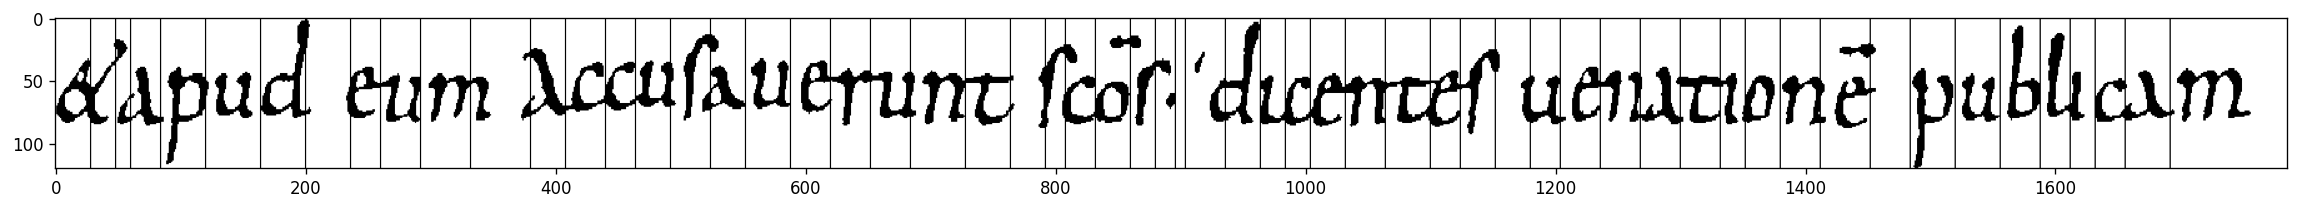

In [ ]:
idx = random.randint(0,len(all_masks)-1)
image_id, masks = all_masks[idx]['id'], all_masks[idx]['mask']

demo_borders(image_id, masks)

"d eum accusaverunt "


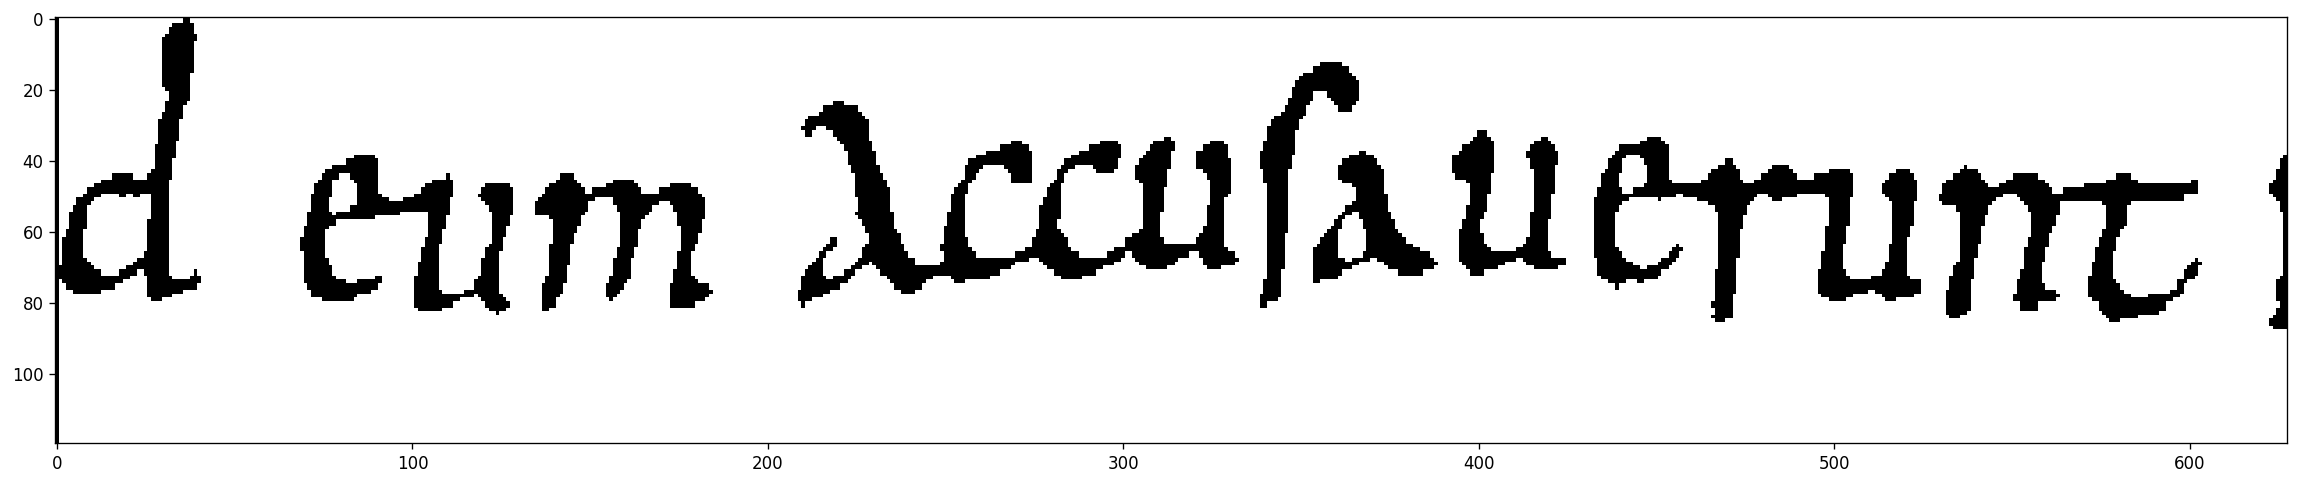

In [ ]:
demo_mask(image_id, masks, 6, 25)